## Exploring Dataset

some steps to follow:
- Introduce the dataset. 
- Systematically walk through the points of exploration that you conducted.
- You should have headers and text that organize your thoughts and findings.
- Don’t forget to export the notebook as an html file for the project submission.

##### Create your Slide Deck Later: this is where Explanation comes in.


For now, I should start  a clear understanding of the data. 

### Gathering Data 

In [1]:
# all needed libraries imported here 
import pandas as pd
import numpy as np 
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [2]:
#read and combine using glob.glob()
all_filenames = [i for i in glob.glob('Data\*.csv')]


In [3]:
#read all csv files in one dataset
df = pd.concat([pd.read_csv(file, dtype ={'rental_access_method': object, 'bike_share_for_all_trip' : object } ) for file in all_filenames], ignore_index=True)


In [4]:
#df.to_csv( "full_fordgobike-tripdata.csv", index=False)


### Assessing Data 

##### Now, I would like to check for existing quality issues and tidiness issues and fix them if possible 

##### Quality issues:
- There are some missing values in the following columns = {'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'bike_share_for_all_trip', 'rental_access_method' }
- Data columns={start_time and end_time} have faulty datatypes because they should have been date values 
- start_station_id and end_station_id both have missing values and wrong datatypes. The Datatypes should have been int but it is float. 
- Duration has faulty values. We'll make it in minutes rather than in seconds.  

In [5]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN,NaN
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259.0,Addison St at Fourth St,37.866249,-122.299371,259.0,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,NaN,NaN
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,NaN,NaN
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,NaN,NaN
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,NaN,NaN


In [6]:
df.tail(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
4890394,2336,2019-12-28 14:49:19,2019-12-28 15:28:15,NaN,NaN,37.809270,-122.475899,NaN,NaN,37.829645,-122.483233,551068,Subscriber,NaN,app
4890395,2297,2019-12-28 14:49:17,2019-12-28 15:27:34,NaN,NaN,37.809275,-122.475875,NaN,NaN,37.829634,-122.483242,593917,Subscriber,NaN,app
4890396,1816,2019-12-27 17:58:23,2019-12-27 18:28:40,NaN,NaN,37.809291,-122.414682,NaN,NaN,37.776921,-122.419472,326273,Subscriber,NaN,app
4890397,687,2019-12-24 18:21:20,2019-12-24 18:32:47,NaN,NaN,37.809576,-122.412358,NaN,NaN,37.807259,-122.410570,607037,Customer,NaN,app
4890398,711,2019-12-24 18:21:41,2019-12-24 18:33:33,NaN,NaN,37.809578,-122.412348,NaN,NaN,37.807330,-122.410621,167109,Customer,NaN,app
4890399,731,2019-12-28 18:37:29,2019-12-28 18:49:40,NaN,NaN,37.809731,-122.409855,NaN,NaN,37.807573,-122.421681,719651,Subscriber,NaN,app
4890400,748,2019-12-28 18:37:24,2019-12-28 18:49:53,NaN,NaN,37.809768,-122.409797,NaN,NaN,37.807558,-122.421638,655411,Subscriber,NaN,app
4890401,1044,2019-12-26 14:25:37,2019-12-26 14:43:02,NaN,NaN,37.810183,-122.410271,NaN,NaN,37.807225,-122.408850,936881,Subscriber,NaN,app
4890402,326,2019-12-30 20:35:43,2019-12-30 20:41:09,NaN,NaN,37.810471,-122.417386,NaN,NaN,37.803143,-122.414373,397539,Subscriber,NaN,app
4890403,4023,2019-12-31 19:26:48,2019-12-31 20:33:52,NaN,NaN,37.811042,-122.418149,NaN,NaN,37.810970,-122.418054,662304,Subscriber,NaN,app


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890404 entries, 0 to 4890403
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 559.7+ MB


In [8]:
df.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             92505
start_station_name           91904
start_station_latitude           0
start_station_longitude          0
end_station_id               94673
end_station_name             94121
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     762959
rental_access_method       4769566
dtype: int64

***First, we will start by exploring the missing data. We will check out the missing data in rental_access_method.***

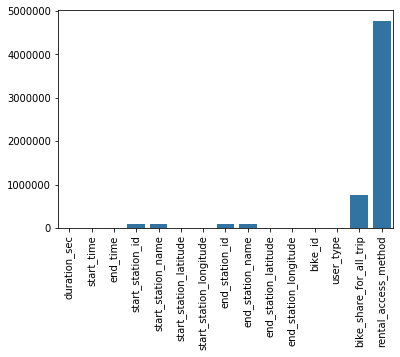

In [9]:
null_count = df.isnull().sum()
base_color = sb.color_palette()[0]
sb.barplot(null_count.index.values, null_count, color = base_color)
plt.xticks(rotation = 90);

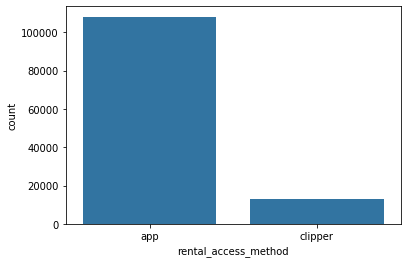

In [10]:
sb.countplot(data = df, x='rental_access_method', color = base_color)


Text(0.5, 0, 'bike share for all the trip')

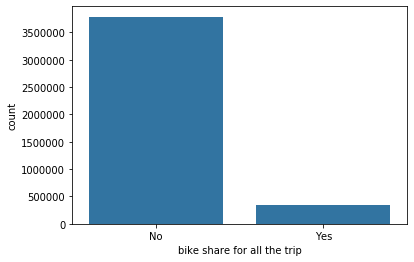

In [11]:
sb.countplot(data = df, x='bike_share_for_all_trip', color = base_color)
plt.xlabel('bike share for all the trip')

In [12]:
df['bike_share_for_all_trip'].isnull().sum()


762959

In [13]:
df[df.duplicated(['start_time', 'end_time', 'start_station_id', 'end_station_id','bike_id'])]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method


Text(0.5, 0, 'User Type')

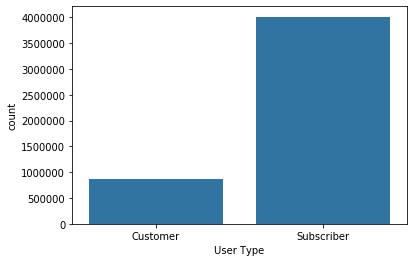

In [14]:
sb.countplot(data = df, x='user_type', color = base_color )
plt.xlabel('User Type')

Text(0.5, 0, "start station's name")

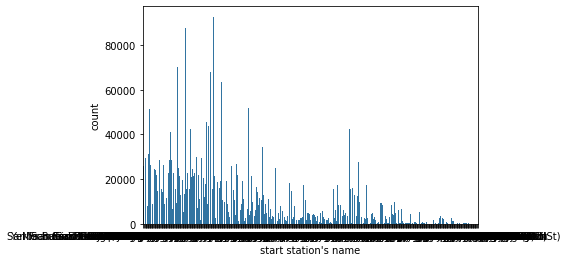

In [15]:
sb.countplot(data = df, x= 'start_station_name', color = base_color)
plt.xlabel('start station\'s name')

***I tried to run the following plot, but it was not running.***

In [16]:
df.duration_sec.describe()

count    4.890404e+06
mean     8.575342e+02
std      2.325582e+03
min      6.000000e+01
25%      3.580000e+02
50%      5.680000e+02
75%      8.860000e+02
max      9.121100e+05
Name: duration_sec, dtype: float64

(array([0.000e+00, 0.000e+00, 2.284e+04, ..., 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([     0,     30,     60, ..., 912060, 912090, 912120], dtype=int64),
 <a list of 30404 Patch objects>)

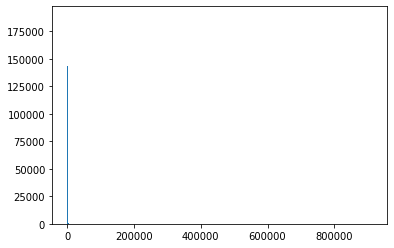

In [17]:
bins_edges = np.arange(0, df.duration_sec.max()+30, 30)
plt.hist(data = df, x= 'duration_sec', bins = bins_edges)

### Cleaning Data 

- We will start by copying df. 

In [18]:
df_clean = df.copy()

***Duration has faulty values.***

*Define*
- We should divide all the values within this column with sixty.

*Code*

In [19]:
df_clean['duration'] = df_clean['duration_sec']/3600.0

In [20]:
df_clean.drop(columns = {'duration_sec'}, inplace = True)

*Test*

In [21]:
df_clean.head(20)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration
0,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,NaN,22.252778
1,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN,NaN,21.888889
2,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,12.713333
3,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,17.270000
4,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN,NaN,12.111944
5,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN,2.562778
6,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259.0,Addison St at Fourth St,37.866249,-122.299371,259.0,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,NaN,NaN,1.251944
7,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,NaN,NaN,1.203889
8,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,NaN,NaN,1.152778
9,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,NaN,NaN,1.177222


***Data columns={start_time and end_time} have faulty datatypes because they should have been date values***

*Define*
- we can correct the datatype through the following code

*Code*

In [22]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

*Test*

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890404 entries, 0 to 4890403
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   start_time               datetime64[ns]
 1   end_time                 datetime64[ns]
 2   start_station_id         float64       
 3   start_station_name       object        
 4   start_station_latitude   float64       
 5   start_station_longitude  float64       
 6   end_station_id           float64       
 7   end_station_name         object        
 8   end_station_latitude     float64       
 9   end_station_longitude    float64       
 10  bike_id                  int64         
 11  user_type                object        
 12  bike_share_for_all_trip  object        
 13  rental_access_method     object        
 14  duration                 float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(5)
memory usage: 559.7+ MB


##### There are some missing values in the following columns = {'rental_access_method' }

*Define*

- you can start by removing the ebtire column because

*Code*

In [24]:
df_clean.drop(columns ={'rental_access_method'}, axis = 1, inplace = True )

*Test*

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890404 entries, 0 to 4890403
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   start_time               datetime64[ns]
 1   end_time                 datetime64[ns]
 2   start_station_id         float64       
 3   start_station_name       object        
 4   start_station_latitude   float64       
 5   start_station_longitude  float64       
 6   end_station_id           float64       
 7   end_station_name         object        
 8   end_station_latitude     float64       
 9   end_station_longitude    float64       
 10  bike_id                  int64         
 11  user_type                object        
 12  bike_share_for_all_trip  object        
 13  duration                 float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(4)
memory usage: 522.4+ MB


In [26]:
df_clean[df_clean['bike_share_for_all_trip'].isnull()][['start_time', 'end_time']].describe()


,start_time,end_time
count,762959,762959
unique,758245,758256
top,2019-07-30 07:59:17,2019-07-26 10:04:08
freq,5,4
first,2017-06-28 09:47:36.347000,2017-06-28 09:52:55.338000
last,2019-12-31 23:59:41,2020-01-01 10:37:57


***There are some missing values in the following columns = {'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'bike_share_for_all_trip'}***

*Define* 
- We can drop the rows with null values.

*Code*

In [27]:
df_clean.dropna(axis = 0, inplace = True)

*Test*

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4114929 entries, 519700 to 4738891
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   start_time               datetime64[ns]
 1   end_time                 datetime64[ns]
 2   start_station_id         float64       
 3   start_station_name       object        
 4   start_station_latitude   float64       
 5   start_station_longitude  float64       
 6   end_station_id           float64       
 7   end_station_name         object        
 8   end_station_latitude     float64       
 9   end_station_longitude    float64       
 10  bike_id                  int64         
 11  user_type                object        
 12  bike_share_for_all_trip  object        
 13  duration                 float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(4)
memory usage: 470.9+ MB


In [29]:
df_clean.isnull().sum()

start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
duration                   0
dtype: int64

***start_station_id and end_station have faulty datatypes.***

*Define*
-  We must change them into integer values.

*Code*

In [30]:
df_clean[['start_station_id','end_station_id']] = df_clean[['start_station_id','end_station_id']].astype(int)

*Test*

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4114929 entries, 519700 to 4738891
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   start_time               datetime64[ns]
 1   end_time                 datetime64[ns]
 2   start_station_id         int32         
 3   start_station_name       object        
 4   start_station_latitude   float64       
 5   start_station_longitude  float64       
 6   end_station_id           int32         
 7   end_station_name         object        
 8   end_station_latitude     float64       
 9   end_station_longitude    float64       
 10  bike_id                  int64         
 11  user_type                object        
 12  bike_share_for_all_trip  object        
 13  duration                 float64       
dtypes: datetime64[ns](2), float64(5), int32(2), int64(1), object(4)
memory usage: 439.5+ MB


### Reassessment of the Data

- I want to check for the last time if there are any inconsistencies in the data.

In [32]:
df_clean.describe()

,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,duration
count,4.114929e+06,4.114929e+06,4.114929e+06,4.114929e+06,4.114929e+06,4.114929e+06,4.114929e+06,4.114929e+06
mean,1.336637e+02,3.776945e+01,-1.223536e+02,1.310528e+02,3.776918e+01,-1.223516e+02,3.666260e+03,2.299067e-01
std,1.129648e+02,1.020171e-01,1.445134e-01,1.124019e+02,1.633245e-01,4.378666e-01,3.130489e+03,5.889720e-01
min,3.000000e+00,0.000000e+00,-1.224952e+02,3.000000e+00,0.000000e+00,-1.224952e+02,4.000000e+00,1.694444e-02
25%,4.100000e+01,3.777041e+01,-1.224117e+02,3.600000e+01,3.777106e+01,-1.224113e+02,1.494000e+03,9.833333e-02
50%,9.600000e+01,3.778095e+01,-1.223983e+02,9.300000e+01,3.778107e+01,-1.223974e+02,2.879000e+03,1.563889e-01
75%,2.110000e+02,3.779625e+01,-1.222934e+02,2.030000e+02,3.779728e+01,-1.222935e+02,4.670000e+03,2.438889e-01
max,4.930000e+02,4.551000e+01,0.000000e+00,4.930000e+02,4.551000e+01,0.000000e+00,1.311200e+04,2.399056e+01


In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4114929 entries, 519700 to 4738891
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   start_time               datetime64[ns]
 1   end_time                 datetime64[ns]
 2   start_station_id         int32         
 3   start_station_name       object        
 4   start_station_latitude   float64       
 5   start_station_longitude  float64       
 6   end_station_id           int32         
 7   end_station_name         object        
 8   end_station_latitude     float64       
 9   end_station_longitude    float64       
 10  bike_id                  int64         
 11  user_type                object        
 12  bike_share_for_all_trip  object        
 13  duration                 float64       
dtypes: datetime64[ns](2), float64(5), int32(2), int64(1), object(4)
memory usage: 439.5+ MB


In [34]:
df_clean['bike_share_for_all_trip'].value_counts()

No     3775899
Yes     339030
Name: bike_share_for_all_trip, dtype: int64

In [52]:
df_clean['user_type'].value_counts()

Subscriber    3435786
Customer       679143
Name: user_type, dtype: int64

### Exploring Dataset

***Now, I will start reassessing the data to understand the different relationships in that dataset. In addition, I will try to detect the existing patterns in the dataset.***

***I would like to see percentage of people who do share their trips. Then I want to see if there are any subscribers and their percentage relative to those who are customers***

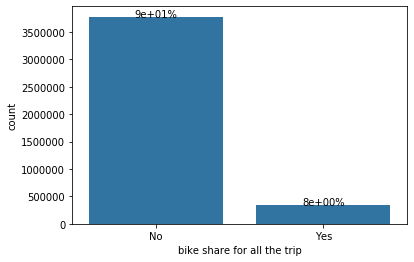

In [54]:
#fig_dims = (3,3)
#fig,ax = plt.subplots(figsize = fig_dims)
sb.countplot(data = df_clean, x='bike_share_for_all_trip', color = base_color)
plt.xlabel('bike share for all the trip')

n_points = df_clean.shape[0]
bike_share_counts = df_clean['bike_share_for_all_trip'].value_counts()
locs, labels = plt.xticks()

for loc,label in zip(locs, labels):
    
    count = bike_share_counts[label.get_text()]
    pct_string = '{:0.1}%'.format(100*count/n_points)
    
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'k')


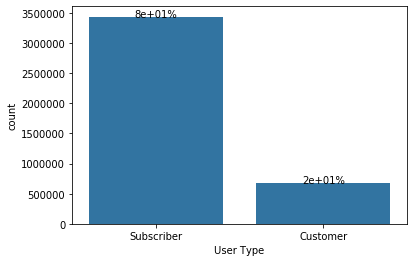

In [55]:
sb.countplot(data = df_clean, x='user_type', color = base_color )
plt.xlabel('User Type')

n_points = df_clean.shape[0]
bike_share_counts = df_clean['user_type'].value_counts()
locs, labels = plt.xticks()

for loc,label in zip(locs, labels):
    
    count = bike_share_counts[label.get_text()]
    pct_string = '{:0.1}%'.format(100*count/n_points)
    
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'k')

***Now, I would like to check if there is a relationship between people who share their trip and subscribers.*** 

In [37]:
df_clean['duration'].describe()

count    4.114929e+06
mean     2.299067e-01
std      5.889720e-01
min      1.694444e-02
25%      9.833333e-02
50%      1.563889e-01
75%      2.438889e-01
max      2.399056e+01
Name: duration, dtype: float64

***We can see that this is severely right skeweness***

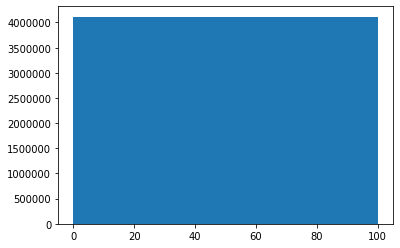

In [38]:
#TODO: should I remove the information in the following cell?
bins_edges = np.arange(0, df_clean.duration.max()+ 100, 100 )
plt.hist(data = df_clean, x= 'duration', bins = bins_edges);


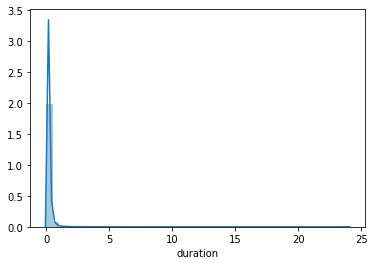

In [39]:
sb.distplot(df_clean.duration)

***For now, I will check for ***

In [ ]:
# fontsize=12